In [313]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
data = pd.read_excel(r"C:\Users\sushrutjoshi\Downloads\wheat arrival.xlsx")
data

,Date,Arrival
0,2024-09-01,933369.6
1,2024-08-01,1013160.4
2,2024-07-01,1148453.8
3,2024-06-01,1772273.3
4,2024-05-01,4802722.8
...,...,...
67,2019-02-01,519099.8
68,2019-01-01,408483.1
69,2018-12-01,483516.0
70,2018-11-01,457719.1


In [315]:
data['Date'] = pd.to_datetime(data['Date'])

# Group by Month and sum the quantities
aggregated = data.groupby('Date', as_index=False)['Arrival'].sum()

aggregated_ts = aggregated.copy()
aggregated.set_index('Date', inplace=True)

aggregated

,Arrival
Date,
2018-10-01,613206.4
2018-11-01,457719.1
2018-12-01,483516.0
2019-01-01,408483.1
2019-02-01,519099.8
...,...
2024-05-01,4802722.8
2024-06-01,1772273.3
2024-07-01,1148453.8


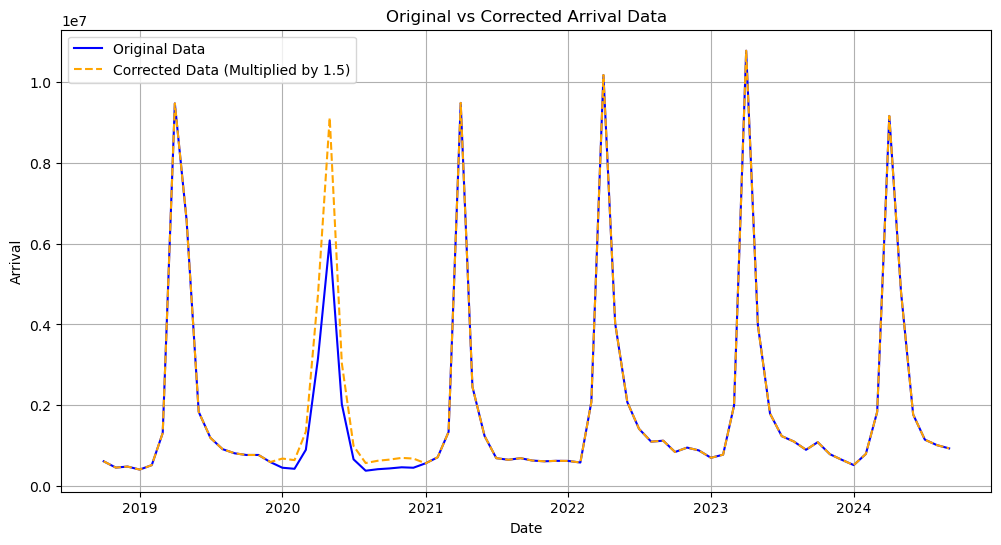

In [317]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df =  aggregated_ts

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Identify the anomaly period (adjust based on the graph)
anomaly_start = '2020-01-01'
anomaly_end = '2020-12-31'

# Apply the correction by multiplying Arrival values within the anomaly period by 1.5
df['Corrected Arrival'] = df['Arrival']
mask = (df['Date'] >= anomaly_start) & (df['Date'] <= anomaly_end)
df.loc[mask, 'Corrected Arrival'] = df.loc[mask, 'Arrival'] * 1.5

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Arrival'], label='Original Data', color='blue', linewidth=1.5)
plt.plot(df['Date'], df['Corrected Arrival'], label='Corrected Data (Multiplied by 1.5)', color='orange', linewidth=1.5, linestyle='--')
plt.xlabel('Date')
plt.ylabel('Arrival')
plt.title('Original vs Corrected Arrival Data')
plt.legend()
plt.grid()
plt.show()


In [318]:
df = df[['Date', 'Corrected Arrival']]

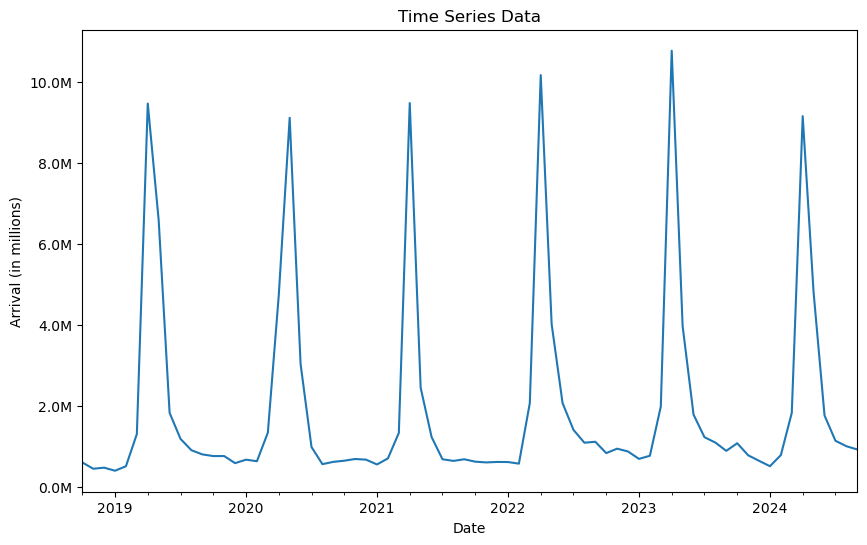

C:\Users\sushrutjoshi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sushrutjoshi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            Arrival   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -908.596
Date:                            Mon, 09 Dec 2024   AIC                           1827.191
Time:                                    23:33:52   BIC                           1837.579
Sample:                                10-01-2018   HQIC                          1831.246
                                     - 09-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2178      0.302     -0.721      0.471      -0.810       0.374
ma.L1         -0.7087      0.223   

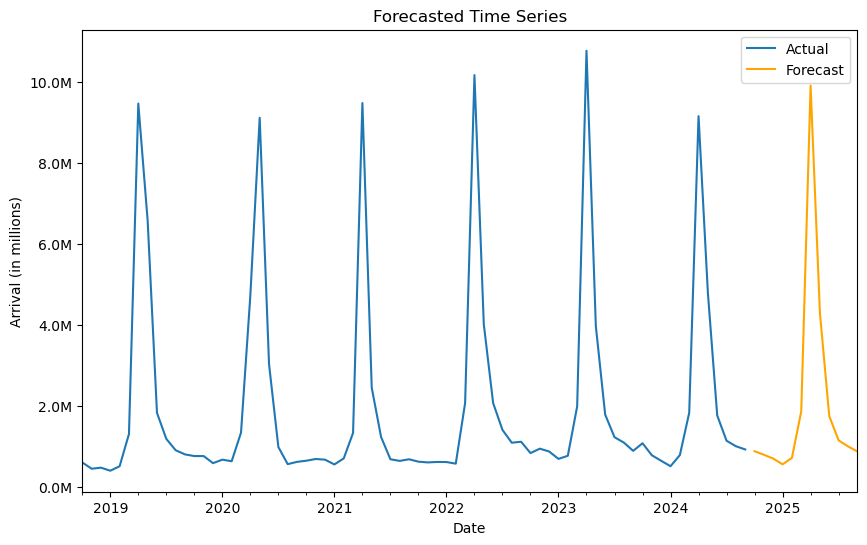

In [323]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.ticker import FuncFormatter

# df = aggregated.copy()
# Plot the data
df.set_index('Date', inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))

df['Corrected Arrival'].plot(ax=ax)

# Format y-axis labels to show values in millions (10^6)
formatter = FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M')
ax.yaxis.set_major_formatter(formatter)

# Add title and labels
ax.set_title("Time Series Data")
ax.set_ylabel("Arrival (in millions)")
ax.set_xlabel("Date")
plt.show()

# Forecast using ARIMA
model = SARIMAX(aggregated, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_model = model.fit()

# Print the summary
print(fitted_model.summary())

# Make a forecast
forecast = fitted_model.forecast(steps=12)  # Forecast for the next 12 months
print(forecast)

# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))
df['Corrected Arrival'].plot(ax=ax, label='Actual')
forecast.plot(ax=ax, label='Forecast', color='orange')

# Format y-axis labels to millions
ax.yaxis.set_major_formatter(formatter)

# Add title and labels
ax.set_title("Forecasted Time Series")
ax.set_ylabel("Arrival (in millions)")
ax.set_xlabel("Date")
plt.legend()
plt.show()

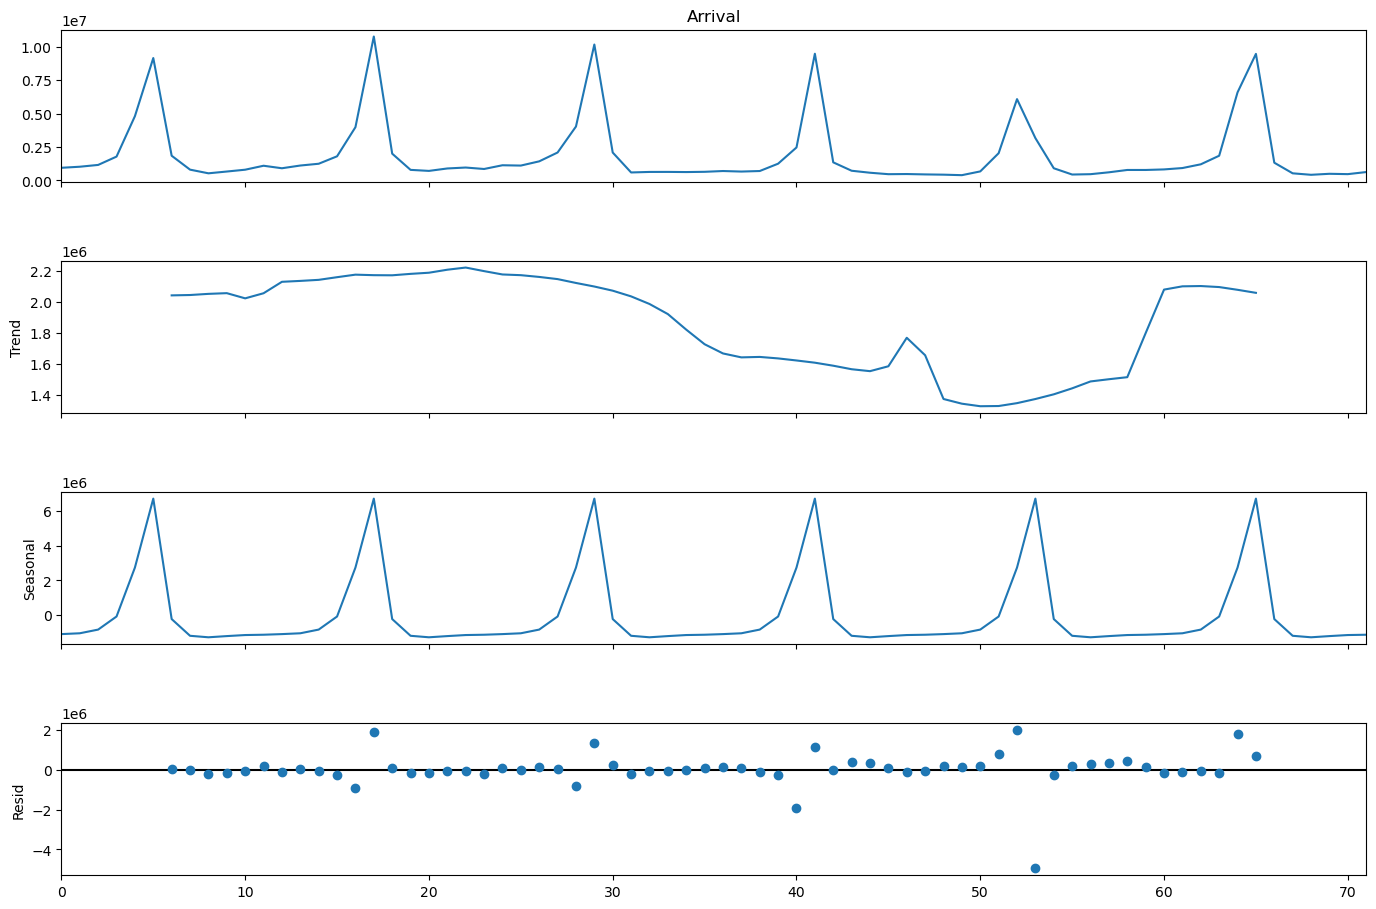

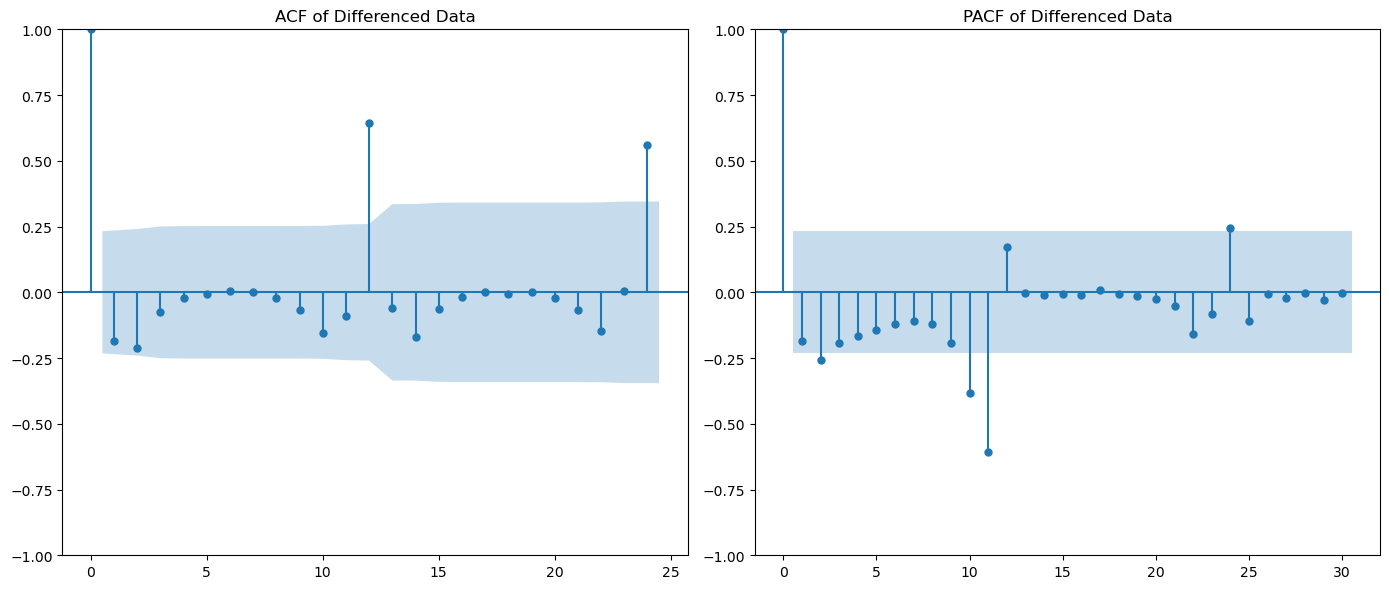

C:\Users\sushrutjoshi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sushrutjoshi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sushrutjoshi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sushrutjoshi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an in

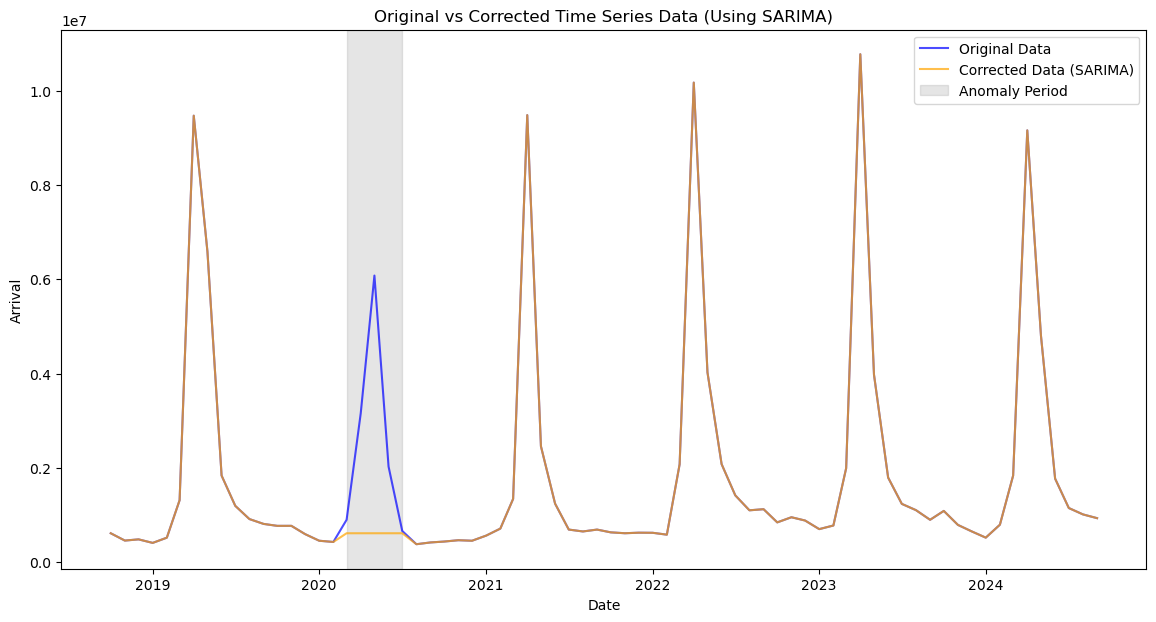

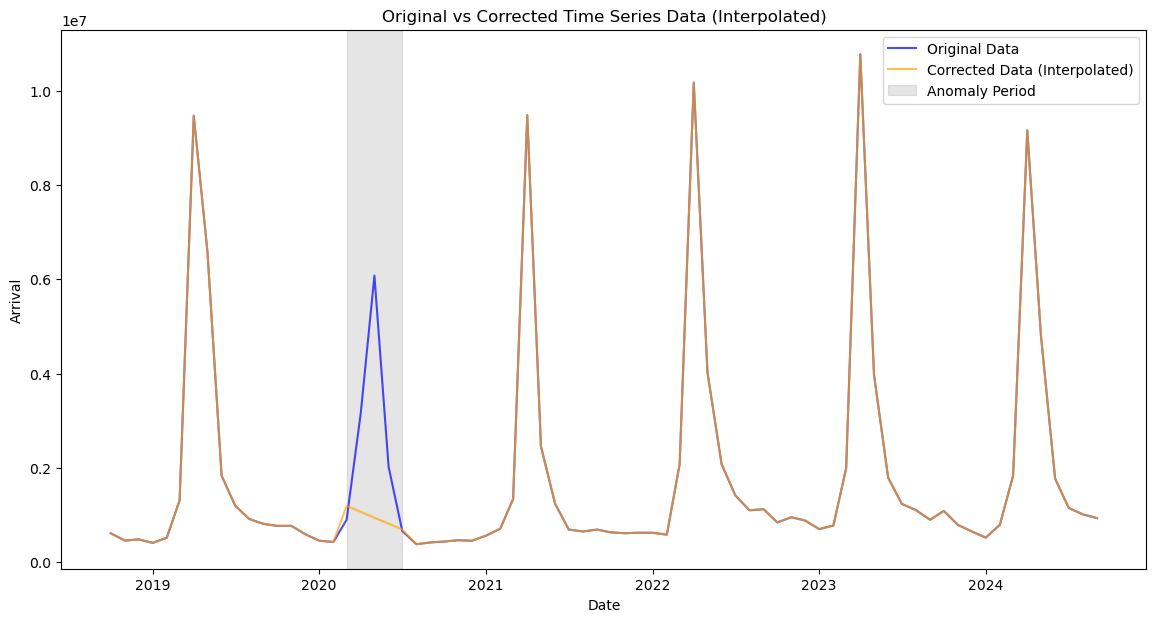

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame with the time series, and 'Arrival' is the column of interest

# Step 1: Identify anomaly period and previous/next peaks
anomaly_period = (data.index >= '2020-03-01') & (data.index <= '2020-07-01')
anomaly_indices = data.loc[anomaly_period].index

# Find previous and next peaks manually (replace these with actual indices based on your data)
previous_peak = data.loc['2019-07-01', 'Arrival']
next_peak = data.loc['2021-07-01', 'Arrival']

# Step 2: Generate linearly interpolated values for the anomaly period
interpolated_values = np.linspace(previous_peak, next_peak, num=len(anomaly_indices))

# Step 3: Replace anomaly values with interpolated values
corrected_data = data.copy()
corrected_data.loc[anomaly_indices, 'Arrival'] = interpolated_values

# Step 4: Plot the corrected data
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Arrival'], label='Original Data', color='blue', alpha=0.7)
plt.plot(corrected_data.index, corrected_data['Arrival'], label='Corrected Data (Interpolated)', color='orange', alpha=0.7)
plt.axvspan(anomaly_indices[0], anomaly_indices[-1], color='gray', alpha=0.2, label='Anomaly Period')
plt.title("Original vs Corrected Time Series Data (Interpolated)")
plt.xlabel("Date")
plt.ylabel("Arrival")
plt.legend()
plt.show()


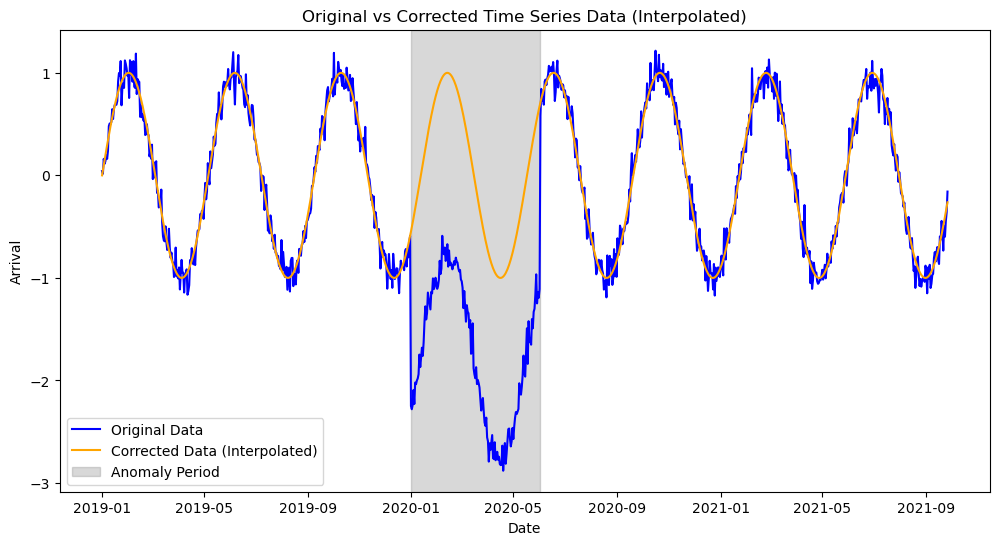